In [1]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
#Packages
# import hmvec as hm          # once the luminosity stuff is in code
import cib
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib

#Plot settings
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 'x-large'
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['legend.fontsize'] = 'xx-large'

# $ \Sigma (M)$

This is our actual $\Sigma$

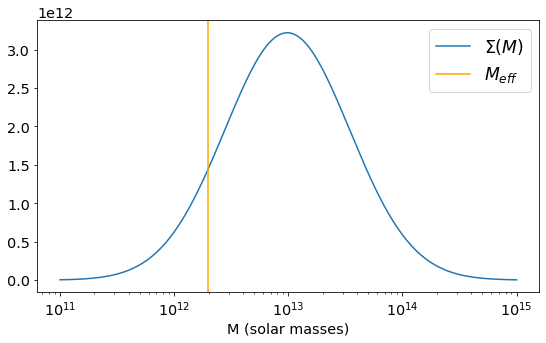

In [3]:
#Inputs
masses = np.logspace(11,15, num=200)

#Plot
plt.figure(figsize=(9,5));
plt.plot(masses, cib.capitalSigma(masses), label=r'$\Sigma(M)$');
plt.axvline(x=10**12.3, ls='-', color='orange', label=r'$M_{eff}$')

#Plotting extras
plt.xscale('log')
plt.legend()
plt.xlabel('M (solar masses)');

Although slight, the Gaussian is definitely asymmetric. You can increase the spread in the definition of $\Sigma$ to see the asymmetry more.

Of course, the function is also shifted to the right (see Aside #1 for more).

## Aside
This section demonstrates certain principles that went into making the above plot

1. The following compares a Gaussian with an x*Gaussian. Clearly, the multiplication of x shifts the mean to the right. It also scales the whole thing. Our $\Sigma$ doesn't look like this because it's Gaussian on a log scale already.

The peak of the Gaussian is 133 
The peak of the x*Gaussian is 145


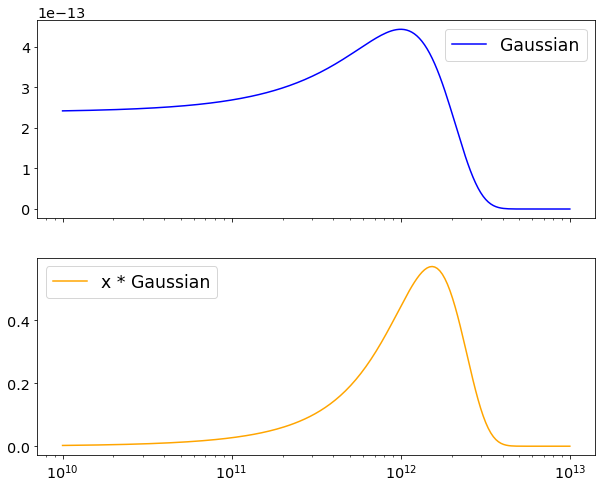

In [4]:
x = np.logspace(10,13, num=200)
mu = 1e12
sigma = 1e12 - 1e11

y1 = norm.pdf(x,mu,sigma)
y2 = x*norm.pdf(x,mu,sigma)

fig, axes = plt.subplots(2, sharex=True, figsize=(10,8))
axes[0].semilogx(x, y1, color='blue', label='Gaussian')
axes[1].semilogx(x, y2, color='orange' ,label='x * Gaussian')

axes[0].legend()
axes[1].legend()

print('The peak of the Gaussian is {} \nThe peak of the x*Gaussian is {}'.format(np.argmax(y1), np.argmax(y2)))

2. The following demonstrates the difference between a linspace and logspace on a linear and log plot scale

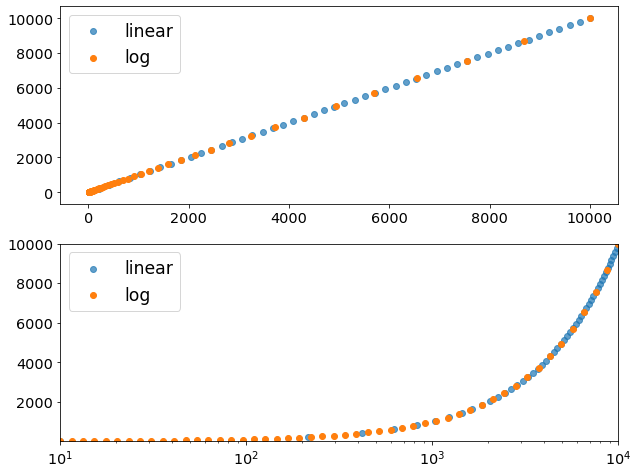

In [5]:
y = np.logspace(1, 4)
x = np.linspace(1e1, 1e4)

#Plotting
fig, ax = plt.subplots(2, figsize=(10,8))
for i in range(2):
    ax[i].scatter(x,x, label='linear', alpha=0.7)
    ax[i].scatter(y,y, label='log')
    ax[i].legend()

#Gravy
plt.xscale('log')
plt.xlim(10, 1e4)
plt.ylim(10, 1e4);

# Redshift Dependance of Luminosity

No handles with labels found to put in legend.


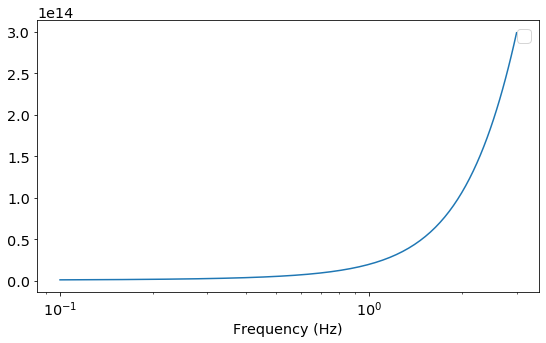

In [6]:
#Inputs
redshifts = np.linspace(0.1, 3)
M = 10**12.3
freq = 545.0e9 #Ghz

#Plot
plt.figure(figsize=(9,5));
plt.plot(redshifts, cib.luminosity(M, redshifts, freq));

#Plotting extras
plt.xscale('log')
plt.legend(fontsize='xx-large')
plt.xlabel('Frequency (Hz)');

In [7]:
x=np.linspace(0,3)
y=np.array([5])

xx,yy=np.meshgrid(x,y)
print(x)
print(y)
print(xx)
print(yy)

[0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]
[5]
[[0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
  0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
  0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
  1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
  1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
  1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
  2.20408163 2.26530612 2.3265

In [10]:
print(xx.shape)
print(yy.shape)

(1, 50)
(1, 50)
